<a href="https://colab.research.google.com/github/sora3765/YOLOv3_Test/blob/main/YOLOv3_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
git clone https://github.com/AlexeyAB/darknet
cd darknet
make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/dark_cuda.c -o obj/dark_cuda.o
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/conv

Cloning into 'darknet'...
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     for (int old_id = 0; old_id < old_dets.size(); ++old_id) {
                          ~~~~~~~^~~~~~~~~~~~~~~~~
./src/http_stream.cpp:894:31: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     for (int index = 0; index < new_dets_num*old_dets.size(); ++index) {
   

In [2]:
# 重みのサンプルをダウンロード
%%bash
cd darknet
wget https://pjreddie.com/media/files/yolov3.weights

--2022-12-02 01:36:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

     0K .......... .......... .......... .......... ..........  0%  356K 11m21s
    50K .......... .......... .......... .......... ..........  0%  356K 11m21s
   100K .......... .......... .......... .......... ..........  0%  355K 11m21s
   150K .......... .......... .......... .......... ..........  0% 47.7M 8m32s
   200K .......... .......... .......... .......... ..........  0%  359K 9m4s
   250K .......... .......... .......... .......... ..........  0%  116M 7m34s
   300K .......... .......... .......... .......... ..........  0%  132M 6m29s
   350K .......... .......... .......... .......... ..........  0% 75.9M 5m41s
   400K .......... .......... .....

In [3]:
%%bash
cd darknet
./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 GPU isn't used 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 32013 K-images (500 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
data/person.jpg: Predicted in 7600.317000 milli-seconds.
dog: 99%
person: 100%
horse: 100%


 OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shor

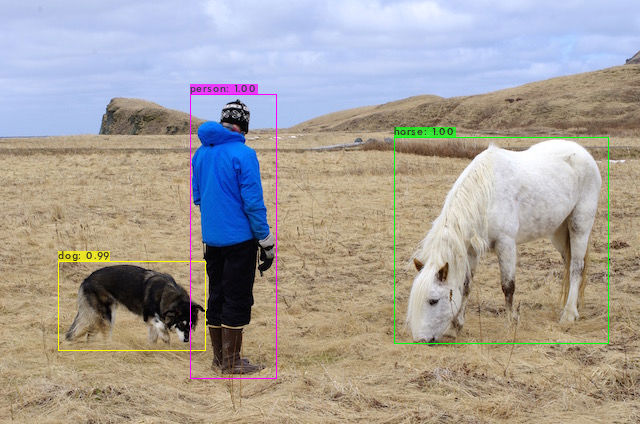

In [4]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('darknet/predictions.jpg'))

In [5]:
%%bash
cd darknet
./darknet detect cfg/yolov3.cfg yolov3.weights 20221031005300_1.png

 GPU isn't used 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 32013 K-images (500 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
20221031005300_1.png: Predicted in 7856.319000 milli-seconds.
person: 82%
person: 83%
person: 68%
person: 75%
person: 36%


 OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shor

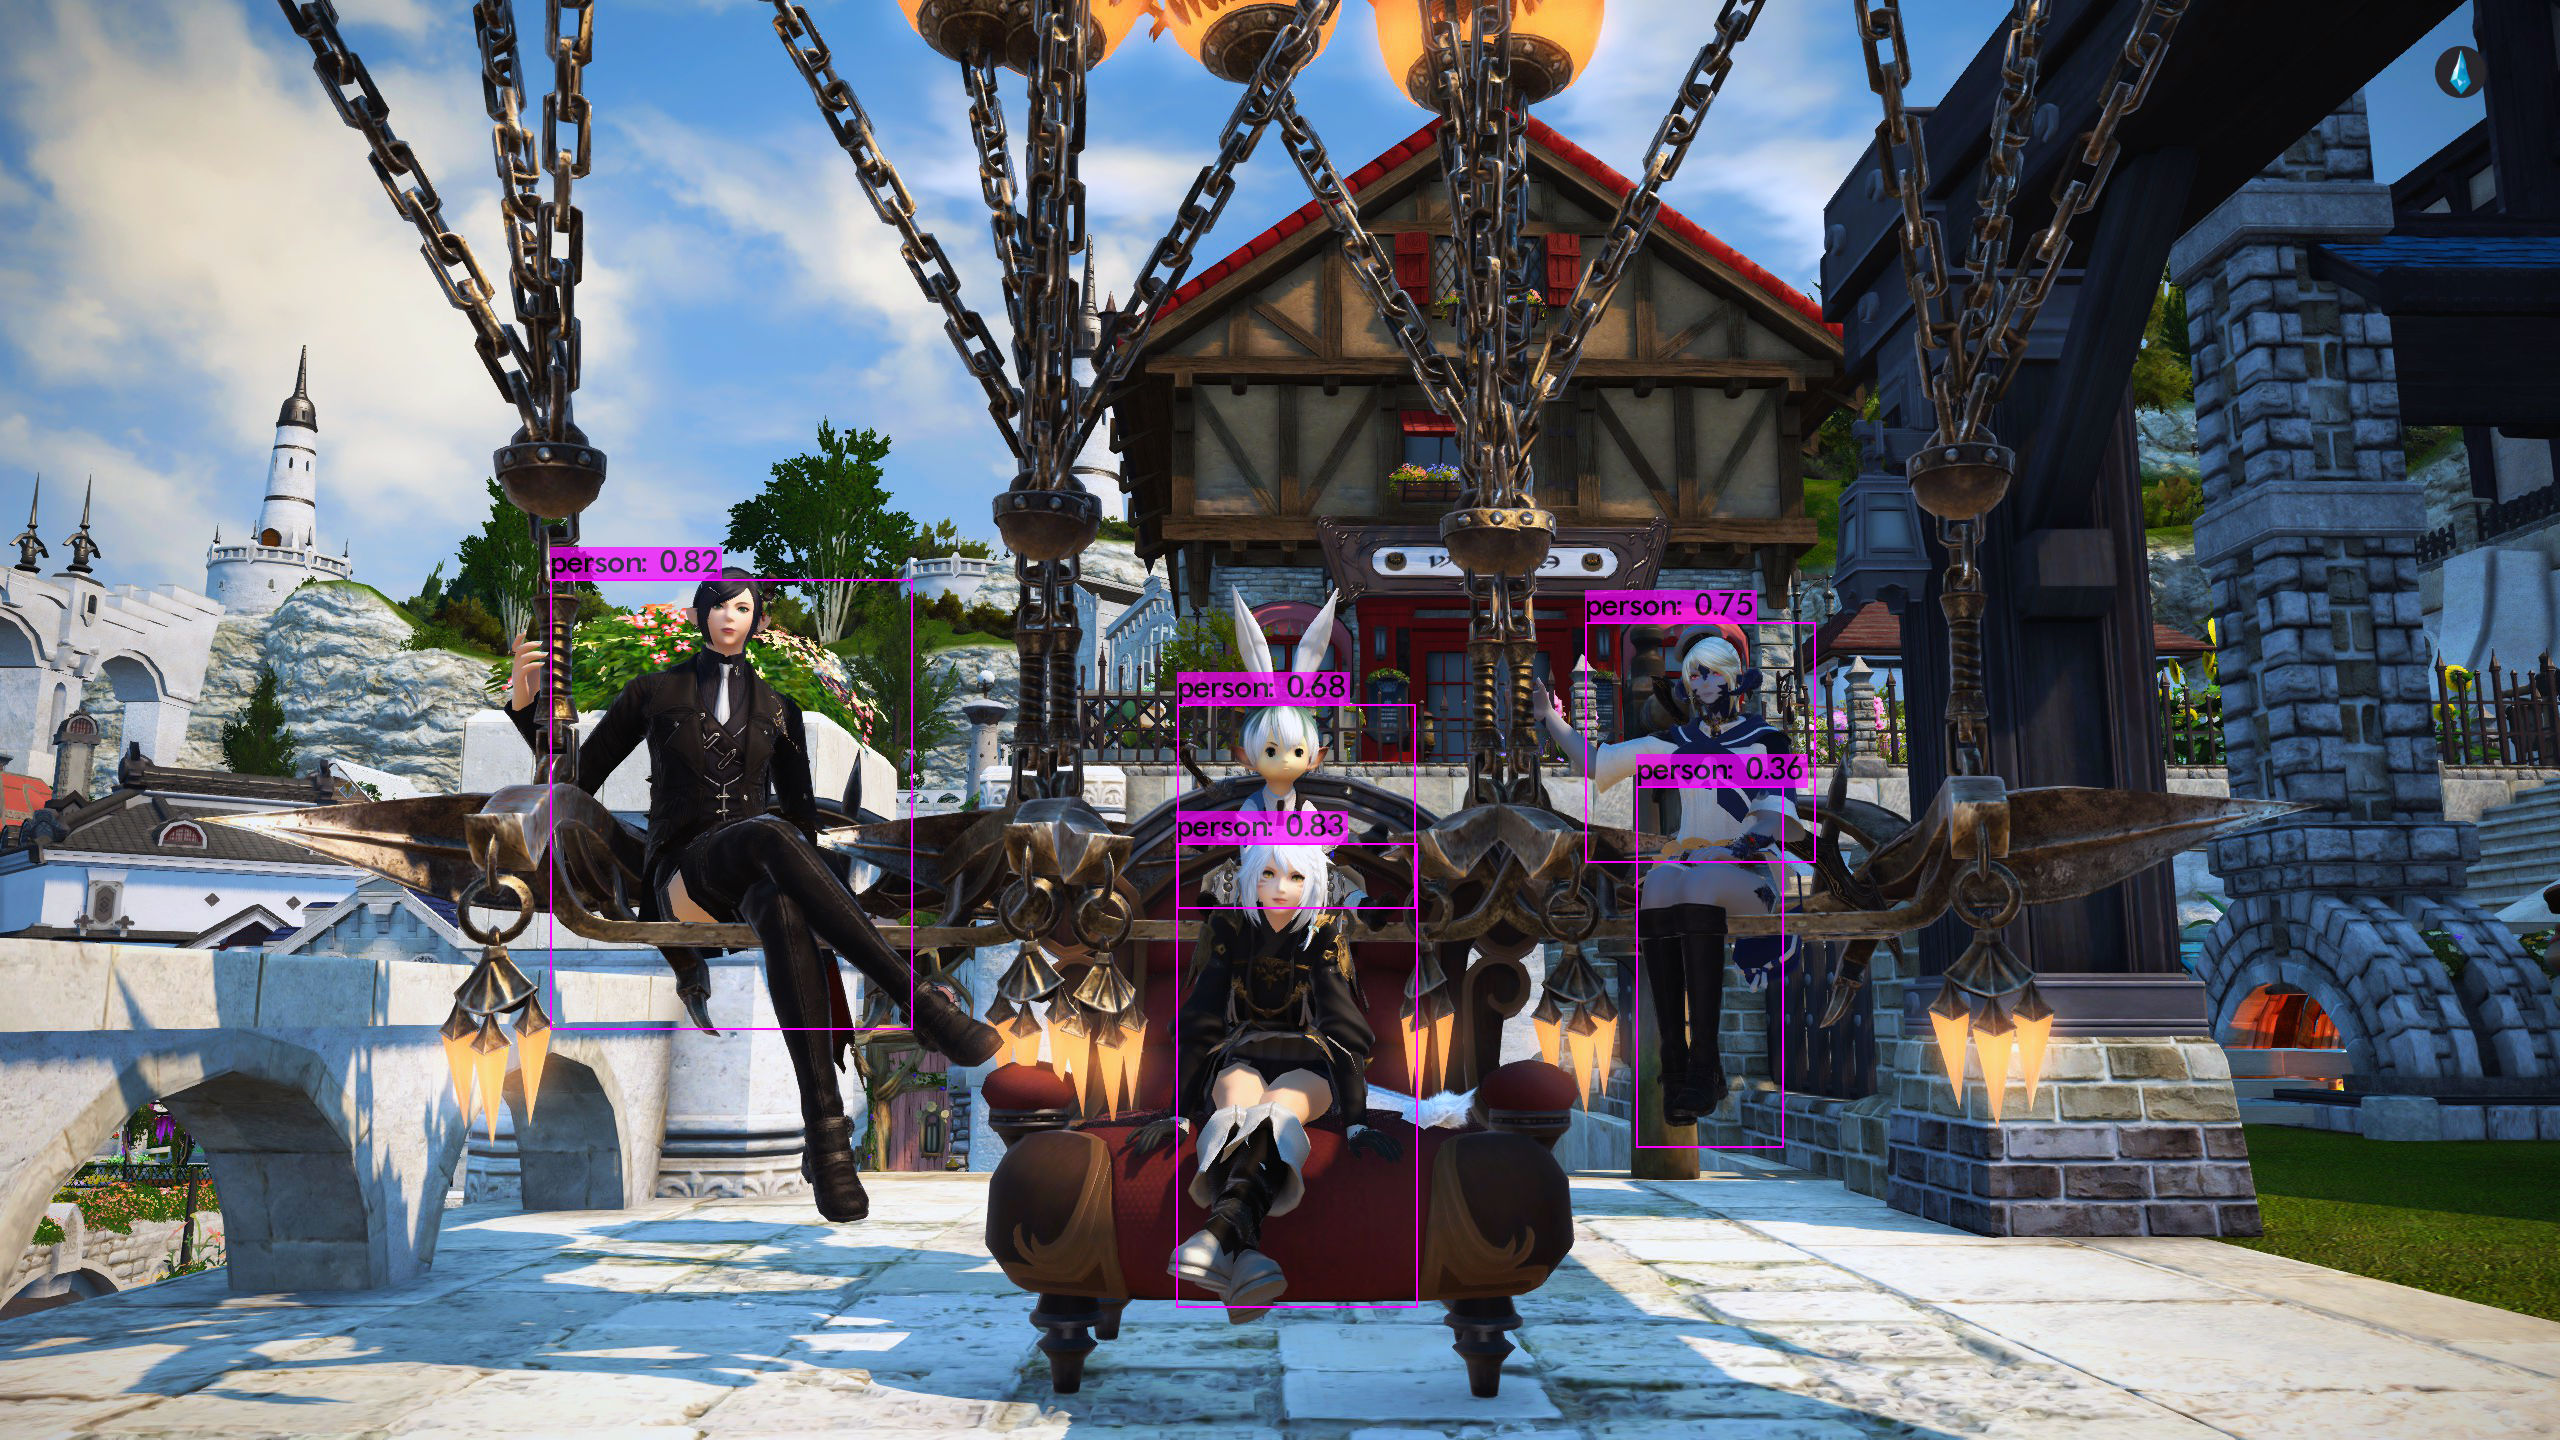

In [7]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('darknet/predictions.jpg'))

In [8]:
# =============================================

In [9]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [10]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 14.5 MB/s 
     |████████████████████████████████| 79 kB 10.1 MB/s 
     |████████████████████████████████| 3.9 MB 66.1 MB/s 
     |████████████████████████████████| 10.2 MB 64.2 MB/s 
     |████████████████████████████████| 548 kB 77.8 MB/s 
     |████████████████████████████████| 662 kB 75.0 MB/s 
     |████████████████████████████████| 140 kB 79.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing inst

In [11]:
!python3 OIDv4_ToolKit/main.py downloader --classes Human_head --type_csv train --limit 1000


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Human head.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 65919 KB/s, 0 seconds passed
[DOWNLOAD] | Fi

In [12]:
!git clone https://github.com/WyattAutomation/Train-YOLOv3-with-OpenImagesV4.git

Cloning into 'Train-YOLOv3-with-OpenImagesV4'...
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Unpacking objects: 100% (94/94), done.


In [13]:
!mkdir OID/Dataset/train/yolotxt

In [14]:
!cp Train-YOLOv3-with-OpenImagesV4/CSVheadstoTXT.py OID/Dataset/train

In [15]:
!python3 OID/Dataset/train/CSVheadstoTXT.py

Traceback (most recent call last):
  File "OID/Dataset/train/CSVheadstoTXT.py", line 5, in <module>
    f=pd.read_csv("/home/sbubby/Desktop/OIDv4_ToolKit/OID/csv_folder/train-annotations-bbox.csv")
  File "/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/usr/local/lib/python3.8/dist-packages/pandas/io/parsers/readers.py", line 1040, in _make_engine
    return mapping[engine](self.f, **self.options)  # type: ignore[call-arg]
  File "/usr/local/lib/python3.8/dist-packag

In [16]:
!cp -r OID/Dataset/train/yolotxt/. OID/Dataset/train/"Human head"/